In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [3]:
# Parsing through soup
url = "https://en.wikipedia.org/wiki/List_of_best-selling_video_games"
page = requests.get(url)
soup = BeautifulSoup(page.text, "html")
table = soup("table")[1]

In [4]:
# Creating Titles for df
titles = table.find_all("th")
df_titles = [title.text.strip().rstrip("[b]") for title in titles]
df_titles

['Title',
 'Sales',
 'Series',
 'Platform(s)',
 'Initial release date',
 'Developer(s)',
 'Publisher(s)',
 'Ref.']

In [5]:
# Creating df
df = pd.DataFrame(columns = df_titles)
df

,Title,Sales,Series,Platform(s),Initial release date,Developer(s),Publisher(s),Ref.


In [6]:
# Filling Data Frame
for i in table.find_all("tr")[1:]:
    tds = i.find_all("td") 
    row_data = [b.text.strip().rstrip("[c}]") for b in tds]
    if len(row_data) != 8:
        row_data.insert(1, "50,000,000")
    length = len(df)
    df.loc[length] = row_data
df = df.drop("Ref.", axis=1)
df

,Title,Sales,Series,Platform(s),Initial release date,Developer(s),Publisher(s)
0,Minecraft,"300,000,000",Minecraft,Multi-platform,"November 18, 2011",Mojang Studios,Mojang Studios
1,Grand Theft Auto V,"195,000,000",Grand Theft Auto,Multi-platform,"September 17, 2013",Rockstar North,Rockstar Games
2,Tetris (EA),"100,000,000",Tetris,Multi-platform,"September 12, 2006",EA Mobile,Electronic Arts
3,Wii Sports,"82,900,000",Wii,Wii,"November 19, 2006",Nintendo EAD,Nintendo
4,PUBG: Battlegrounds,"75,000,000",PUBG Universe,Multi-platform,"December 20, 2017",PUBG Studios,Krafton
5,Mario Kart 8 / Deluxe,"69,040,000",Mario Kart,Wii U / Switch,"May 29, 2014",Nintendo EAD / Nintendo EPD (Deluxe),Nintendo
6,Red Dead Redemption 2,"61,000,000",Red Dead,Multi-platform,"October 26, 2018",Rockstar Games,Rockstar Games
7,Super Mario Bros.,"58,000,000",Super Mario,Multi-platform,"September 13, 1985",Nintendo R&D4,Nintendo
8,Overwatch,"50,000,000",Overwatch,Multi-platform,"May 24, 2016",Blizzard Entertainment,Blizzard Entertainment
9,Human: Fall Flat,"50,000,000",Human: Fall Flat,Multi-platform,"July 22, 2016",No Brakes Games,Curve Digital


In [7]:
# Display Publisher Counts
df["Publisher(s)"].value_counts()

Publisher(s)
Nintendo                          22
Nintendo / The Pokémon Company     4
Rockstar Games                     4
Activision                         4
Blizzard Entertainment             2
CD Projekt                         2
Mojang Studios                     1
2K Games                           1
Warner Bros. Games                 1
Sony Interactive Entertainment     1
EA Sports                          1
Namco                              1
Telltale Games                     1
Re-Logic / 505 Games               1
Curve Digital                      1
Krafton                            1
Electronic Arts                    1
Xbox Game Studios                  1
Name: count, dtype: int64

<Axes: xlabel='Publisher(s)'>

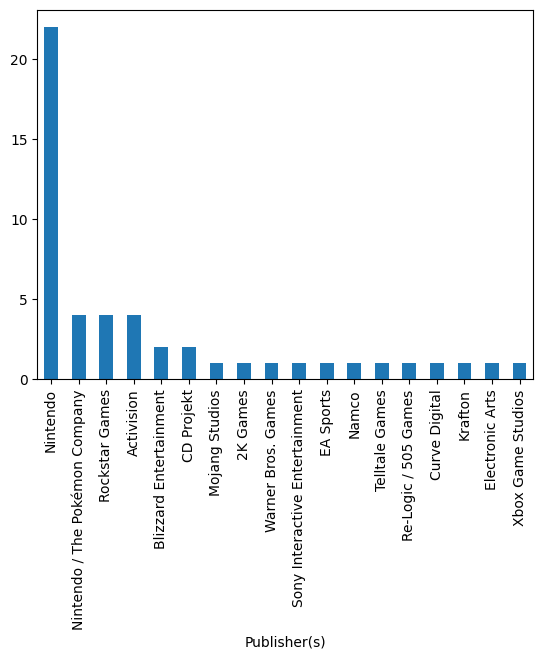

In [8]:
# Graphing Publisher Counts
df["Publisher(s)"].value_counts().plot(kind='bar')

In [9]:
# Create Function to Convert Dates
def convert_dates(date):
    year = date[-4:]
    if date[-8].isnumeric():
        day = date[-8:-6]
    else:
        day = date[-7:-6]
    month = date[:3]
    month_num = datetime.datetime.strptime(month, "%b").month
    dt = datetime.datetime.strptime(f"{month_num}/{day}/{year}", '%m/%d/%Y').date()
    return dt
    #return f"{month_num}/{day}/{year}"

In [10]:
# Applying function to Release Date Column
df["Initial release date"] = df["Initial release date"].apply(convert_dates)
df

,Title,Sales,Series,Platform(s),Initial release date,Developer(s),Publisher(s)
0,Minecraft,"300,000,000",Minecraft,Multi-platform,2011-11-18,Mojang Studios,Mojang Studios
1,Grand Theft Auto V,"195,000,000",Grand Theft Auto,Multi-platform,2013-09-17,Rockstar North,Rockstar Games
2,Tetris (EA),"100,000,000",Tetris,Multi-platform,2006-09-12,EA Mobile,Electronic Arts
3,Wii Sports,"82,900,000",Wii,Wii,2006-11-19,Nintendo EAD,Nintendo
4,PUBG: Battlegrounds,"75,000,000",PUBG Universe,Multi-platform,2017-12-20,PUBG Studios,Krafton
5,Mario Kart 8 / Deluxe,"69,040,000",Mario Kart,Wii U / Switch,2014-05-29,Nintendo EAD / Nintendo EPD (Deluxe),Nintendo
6,Red Dead Redemption 2,"61,000,000",Red Dead,Multi-platform,2018-10-26,Rockstar Games,Rockstar Games
7,Super Mario Bros.,"58,000,000",Super Mario,Multi-platform,1985-09-13,Nintendo R&D4,Nintendo
8,Overwatch,"50,000,000",Overwatch,Multi-platform,2016-05-24,Blizzard Entertainment,Blizzard Entertainment
9,Human: Fall Flat,"50,000,000",Human: Fall Flat,Multi-platform,2016-07-22,No Brakes Games,Curve Digital


In [11]:
# Cleaning and Converting Sales Data
df["Sales"] = df["Sales"].replace(',','', regex=True)
df = df.astype({"Sales":"int"})

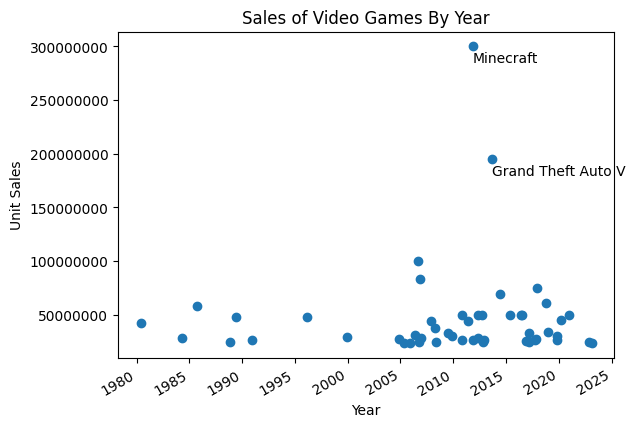

In [15]:
x = df["Initial release date"]
y = df["Sales"]

# Plotting
plt.ticklabel_format(style='plain')
plt.text(df.iloc[0,4],df.iloc[0,1]-15000000, df.iloc[0,0])
plt.text(df.iloc[1,4],df.iloc[1,1]-15000000, df.iloc[1,0])
plt.xlabel("Year")
plt.ylabel("Unit Sales")
plt.title("Sales of Video Games By Year")
plt.scatter(x,y)
plt.gcf().autofmt_xdate()